In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from scipy import stats 

import missingno as msno 
plt.style.use('seaborn') 

import warnings 
warnings.filterwarnings("ignore") 

mpl.rcParams['axes.unicode_minus'] = False 

%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv", parse_dates = ["datetime"]) 
df_test = pd.read_csv("test.csv", parse_dates = ["datetime"])

In [3]:
df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour

df_test["year"] = df_test["datetime"].dt.year 
df_test["month"] = df_test["datetime"].dt.month 
df_test["day"] = df_test["datetime"].dt.day
df_test["hour"] = df_test["datetime"].dt.hour

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

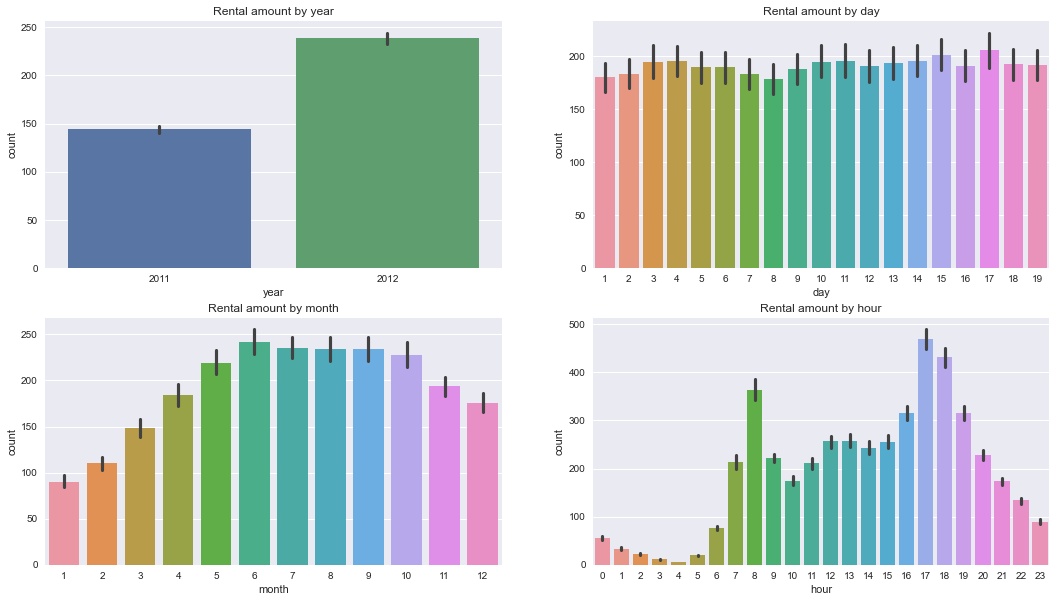

In [4]:
figure, ((ax1,ax3),(ax2,ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(18,10)

sns.barplot(data=df_train, x = "year", y = "count", ax = ax1) 
sns.barplot(data=df_train, x = "month", y = "count", ax = ax2) 
sns.barplot(data=df_train, x = "day", y = "count", ax = ax3)
sns.barplot(data=df_train, x = "hour", y = "count", ax = ax4)

ax1.set(ylabel = "count", title = "Rental amount by year") 
ax2.set(ylabel = "count", title = "Rental amount by month") 
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")

In [5]:
df_train.head() #minute과 second는 관계가 없다고 판단, column을 hour까지만 받아옴.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [6]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4


In [7]:
df_train["dayofweek"] = df_train["datetime"].dt.dayofweek
df_test["dayofweek"] = df_test["datetime"].dt.dayofweek
#요일 변수 추가생성

In [8]:
feature_names = ['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed' 'year', 'hour', 'dayofweek', 'holiday', 'workingday']
feature_names #속성 지정

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeedyear',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
#X = df_train.drop(['casual', 'registered'], axis=1)
# 입력변수(df_train에서 casual, registerd drop - casual과 resgistered는 count값 예측과 상관 x)

In [11]:
#y = pd.DataFrame(X['count'], columns=['count'])
# y에 목표변수(count) 컬럼 생성후 저장

In [12]:
#X.drop('count', axis=1, inplace=True)
# 목표변수인 count drop

In [13]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# train_test_split을 사용해 주어진 데이터를 학습/테스트 데이터로 나눠준다
# 테스트 데이터 20%, 학습데이터 80%

In [14]:
#model = LinearRegression()

In [15]:
#model.fit(X_train, y_train)
#error

In [16]:
#X_train.info()
# datetime Dtype만 column 중 datetime64기 때문에 LinearRegression 지원x

In [17]:
df_train.drop('datetime', axis='columns', inplace=True)
df_test.drop('datetime', axis='columns', inplace=True)
df_train.head()
# 따라서 df_train과 df_test에서 datetime column값 drop
# 이미 parsedate로 불러왔기 datetime에 대한 column들을 생성했기때문에 datetime 필요 x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [18]:
X = df_train.drop(['casual', 'registered'], axis=1)
X.head()
# 다시 정의

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4,5


In [19]:
y = pd.DataFrame(X['count'], columns=['count'])
y.head()

,count
0,16
1,40
2,32
3,13
4,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_test_predict = model.predict(X_test)

In [24]:
mse = mean_squared_error(y_test, y_test_predict)
mse ** 0.5

# 평균제곱오차의 루트를 통해 테스트 데이터에서의 모델 성능 판단
# 선형회귀모델

1.0268089669822729e-13

In [25]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

#sklearn 라이브러리의 linear_model 모듈에서 Lasso/Ridge 모델을 사용해 L1, L2 정규화

In [26]:
X = df_train.drop(['casual', 'registered'], axis=1)
y = pd.DataFrame(X['count'], columns=['count'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=5)
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
mse ** 0.5

# 평균제곱오차의 루트를 통해 테스트 데이터에서의 모델 성능 판단

198.49977043145586

In [27]:
XL1 = df_train.drop(['casual', 'registered', 'count'], axis=1)

In [28]:
polynomial_transformer = PolynomialFeatures(4)
polynomial_features = polynomial_transformer.fit_transform(XL1.values)

#4차항 변환기를 정의하고 4차항 변수로 변환

In [29]:
features = polynomial_transformer.get_feature_names(XL1.columns)
#새로운 변수 이름들 생성

In [30]:
XL1 = pd.DataFrame(polynomial_features, columns=features)
#다항 입력 변수를 dataframe으로 만들어준다.

In [31]:
yL1 = df_train[['count']]

In [32]:
XL1_train, XL1_test, yL1_train, yL1_test = train_test_split(XL1, yL1, test_size=0.3, random_state=5)

In [33]:
model_Lasso = Lasso(alpha=1, max_iter=3000, normalize=True)

In [34]:
model_Lasso.fit(XL1_train, yL1_train)

Lasso(alpha=1, max_iter=3000, normalize=True)

In [35]:
yL1_test_predict = model_Lasso.predict(XL1_test)
yL1_train_predict = model_Lasso.predict(XL1_train)
#predict 메소드를 각가가 training과 test셋 입력 변수들에 대한 예측값을 저장

In [36]:
mse_L1 = mean_squared_error(yL1_train, yL1_train_predict)

print('training set에서 성능')
print('---------------------')
print(f'오차: {sqrt(mse_L1)}')

mse_L1 = mean_squared_error(yL1_test, yL1_test_predict)

print('testing set에서 성능')
print('---------------------')
print(f'오차: {sqrt(mse_L1)}')

training set에서 성능
---------------------
오차: 176.09067749606442
testing set에서 성능
---------------------
오차: 174.0790503458989


In [37]:
XL2 = df_train.drop(['casual', 'registered', 'count'], axis=1)

polynomial_transformer = PolynomialFeatures(4)
polynomial_features = polynomial_transformer.fit_transform(XL2.values)
features = polynomial_transformer.get_feature_names(XL2.columns)

XL2 = pd.DataFrame(polynomial_features, columns=features)
yL2 = df_train[['count']]

XL2_train, XL2_test, yL2_train, yL2_test = train_test_split(XL2, yL2, test_size=0.3, random_state=5)

model_Lasso = Ridge(alpha=1, max_iter=3000, normalize=True)
model_Lasso.fit(XL2_train, yL2_train)

yL2_test_predict = model_Lasso.predict(XL2_test)
yL2_train_predict = model_Lasso.predict(XL2_train)

mse_L2 = mean_squared_error(yL2_train, yL2_train_predict)

print('training set에서 성능')
print('---------------------')
print(f'오차: {sqrt(mse_L2)}')

mse_L2 = mean_squared_error(yL2_test, yL2_test_predict)

print('testing set에서 성능')
print('---------------------')
print(f'오차: {sqrt(mse_L2)}')

training set에서 성능
---------------------
오차: 123.16411633232534
testing set에서 성능
---------------------
오차: 122.2561172435725


In [38]:
train_windspeed_0 = df_train.loc[df_train['windspeed'] == 0]
train_windspeed_not_0 = df_train.loc[df_train['windspeed'] != 0]

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
def predict_windspeed(data):
    data_Wind_0 = data.loc[data['windspeed'] == 0]
    data_Wind_Not_0 = data.loc[data['windspeed'] != 0]
    
    corr_windspeed = ['season', 'weather', 'day', 'temp', 'atemp', 'humidity']
    #풍속이 날씨에 대한 변수기 때문에 날씨에 관련된 변수들을 독립변수로 사용
    
    data_Wind_Not_0['windspeed'] = data_Wind_Not_0['windspeed'].astype('str')
    #data_wind_not_0 windspeed 타입을 str로 변환
    
    model = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=5)
    #n_estimator - 결정트리 수 / max_depth - 트리 깊이
    
    model.fit(data_Wind_Not_0[corr_windspeed], data_Wind_Not_0['windspeed'])
    #training data set 학습
    
    wind_predict = model.predict(data_Wind_0[corr_windspeed])
    
    predict_wind_0 = data_Wind_0
    predict_wind_not_0 = data_Wind_Not_0
    
    predict_wind_0['windspeed'] = wind_predict
    #windspeed = 0 인 값에 예측된 데이터 저장
    
    data = predict_wind_not_0.append(predict_wind_0)
    #predict_wind_not_0에 windspeed를 예측해서 채워 넣은 column을 추가
    
    data['windspeed'] = data['windspeed'].astype('float')
    #다시 float타입으로 변경
    data.reset_index(inplace = True)
    data.drop('index', inplace = True, axis = 1)
    
    return data
    
    

<AxesSubplot:xlabel='windspeed', ylabel='count'>

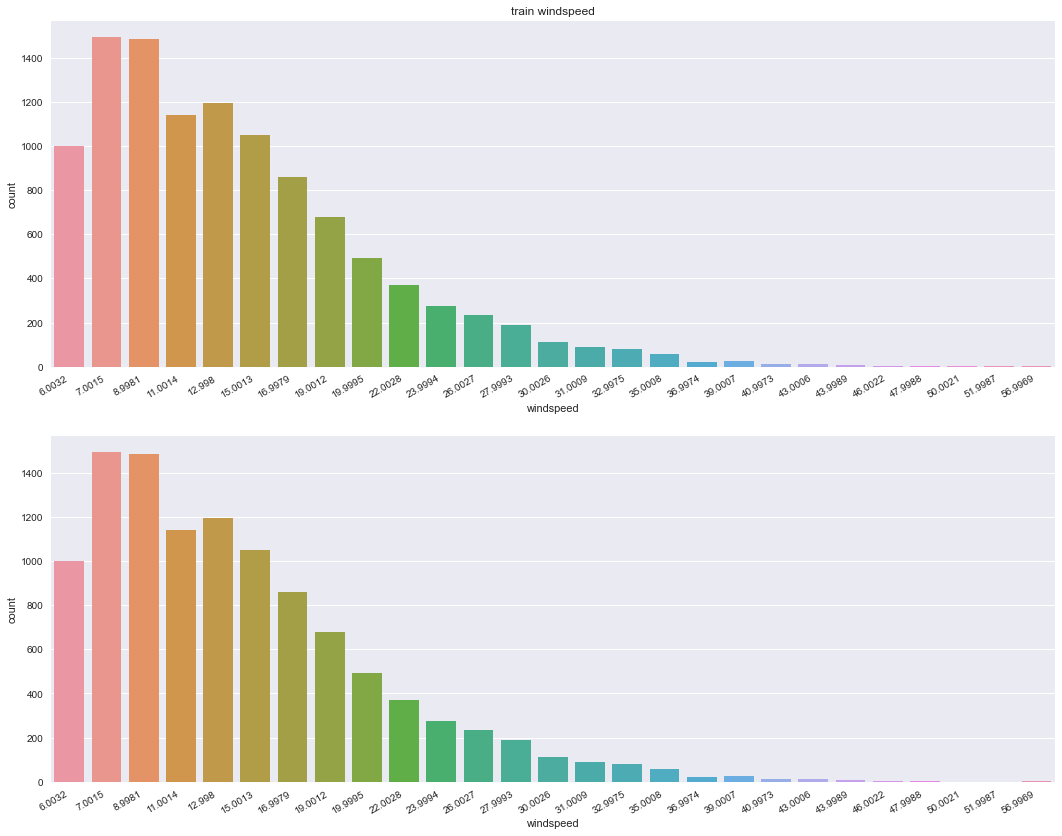

In [41]:
df_train = predict_windspeed(df_train)
df_test = predict_windspeed(df_test)
#원래 df_train과 df_test값에 예측해서 0값 채워넣기
fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (18,14))

plt.sca(ax1)
plt.xticks(rotation = 30, ha = 'right')
ax1.set(ylabel='count', title='train windspeed')
sns.countplot(data=df_train, x='windspeed', ax = ax1)

plt.sca(ax2)
plt.xticks(rotation = 30, ha = 'right')
ax1.set(ylabel='count', title='train windspeed')
sns.countplot(data=df_train, x='windspeed', ax = ax2)
#windspeed의 0값을 조정한 데이터를 시각화

In [42]:
X = df_train.drop(['casual', 'registered'], axis=1)
y = pd.DataFrame(X['count'], columns=['count'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=5)
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
mse ** 0.5

# 평균제곱오차의 루트를 통해 테스트 데이터에서의 모델 성능 판단
# RandomForestClassifier모델은 분류모델이여서 적합하지 않다고 판단

192.38517021591935

In [43]:
X = df_train.drop(['casual', 'registered'], axis=1)
y = pd.DataFrame(X['count'], columns=['count'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=5)
model.fit(X_train, y_train)
y_test_predict = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_predict)
mse ** 0.5

# 평균제곱오차의 루트를 통해 테스트 데이터에서의 모델 성능 판단

8.656809331815174

In [44]:
df_train_rdf

NameError: name 'df_train_rdf' is not defined

In [ ]:
X_train_rdf = df_train[feature_names]
X_test_rdf = df_test[feature_names]

label_name = 'count'

y_train_rdf = df_train[label_name]


In [ ]:
model_RandomForestRegressor = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=5)

In [ ]:
model_RandomForestRegressor.fit(X_train_rdf, y_train_rdf)

RandomForestRegressor(max_depth=4, random_state=5)

In [ ]:
prediction_rdf = model_RandomForestRegressor.predict(X_test_rdf)

[Text(0.5, 1.0, 'test')]

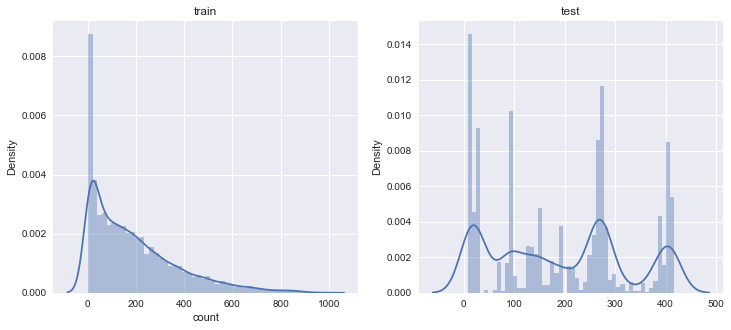

In [ ]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train_rdf,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(prediction_rdf,ax=ax2,bins=50)
ax2.set(title="test")

In [ ]:
submission = pd.read_csv("sampleSubmission.csv",parse_dates=['datetime'])
submission

submission['count'] = prediction_rdf

print(submission.shape)
submission.head()
submission.to_csv('sampleSubmission2.csv', index=False)

#1.8 3100등 - 전처리 X 그냥 가져가서 예측한 값

(6493, 2)
